## Body Fat Data

The goal is to come up with a simple, precise, and accurate way of deteriming body fat percentage of males based on readily available clinical measurements.

The data set contains measurements from 252 men who had their body fat percentage accurately measured via underwater weighing.

Class Question 1: What is our $Y$ (i.e. outcome)?

Class Question 2: What is our possible set of $X$s (i.e. predictors)?

In [1]:
BodyFat = read.csv("BodyFat.csv") #Read data into R
attach(BodyFat) # This "attaches" the data into R. 
dim(BodyFat) # Dimension of the data (number of rows, number of columns)

[1] 252  17

In [2]:
colnames(BodyFat) #Variables in the Data

[1] "IDNO"      "BODYFAT"   "DENSITY"   "AGE"       "WEIGHT"    "HEIGHT"   
 [7] "ADIPOSITY" "NECK"      "CHEST"     "ABDOMEN"   "HIP"       "THIGH"    
[13] "KNEE"      "ANKLE"     "BICEPS"    "FOREARM"   "WRIST"

## Step 1: Analyzing Raw Data



What I typically do first is look at the raw data to see if I see anything interesting (e.g. precision, units of measurement, outliers, general patterns, etc.)

I also read about any background information related to the data.

*Tangent (for your data science career)*: If the data is too large (i.e. say a million data points), I simply take multiple, small random subset of the original data and examine these subsets.

In [15]:
head(BodyFat) #Look at the first few data points 
tail(BodyFat) #Look at the last few data points

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
247,247,29.1,1.0308,69,215.50,70.50,30.5,40.8,113.7,107.6,110.0,63.3,44.0,22.6,37.5,32.6,18.8
248,248,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
249,249,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
250,250,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
251,251,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
252,252,30.7,1.0271,74,207.50,70.00,29.8,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


In [16]:
summary(BodyFat) #Gives you a brief summary statistic of all the variables in the data
# Note that the first column contains the index number of each individual.

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

Some "background reading"...

<img src="BodyFatCalc1.jpg">

<img src="BodyFatImage1.jpg">

Barreira et al. (2011) "Body Adiposity Index, Body Mass Index and Body Fat in White and Black Adults." JAMA.

<img src="BodyFatBmi.jpg">

## Step 2: Visualizing Data
Next, I start looking for the "big picture" by visualizing the data with histograms, scatterplots, and/or boxplots.

Let's start with histograms. The first plot shows one single histogram of body fat %.

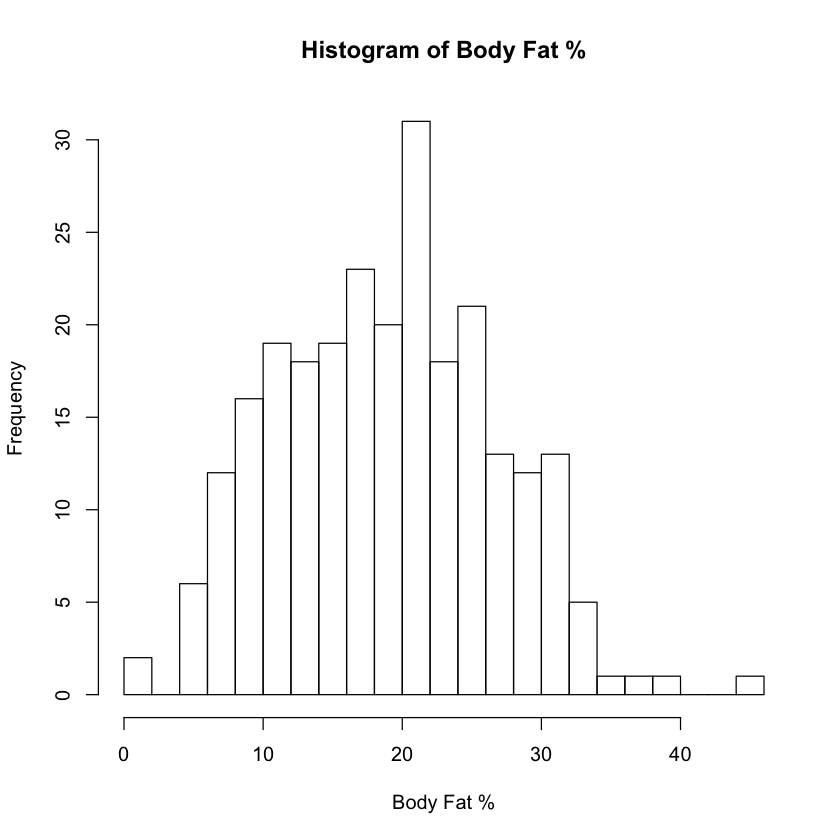

In [25]:
# breaks option inside hist() controls the resolution of the histogram. 
# High breaks number indicates higher resolution while small breaks number indicates low resolution.
# Play around with the breaks!
hist(BODYFAT,breaks=30,
     main="Histogram of Body Fat %",xlab="Body Fat %")

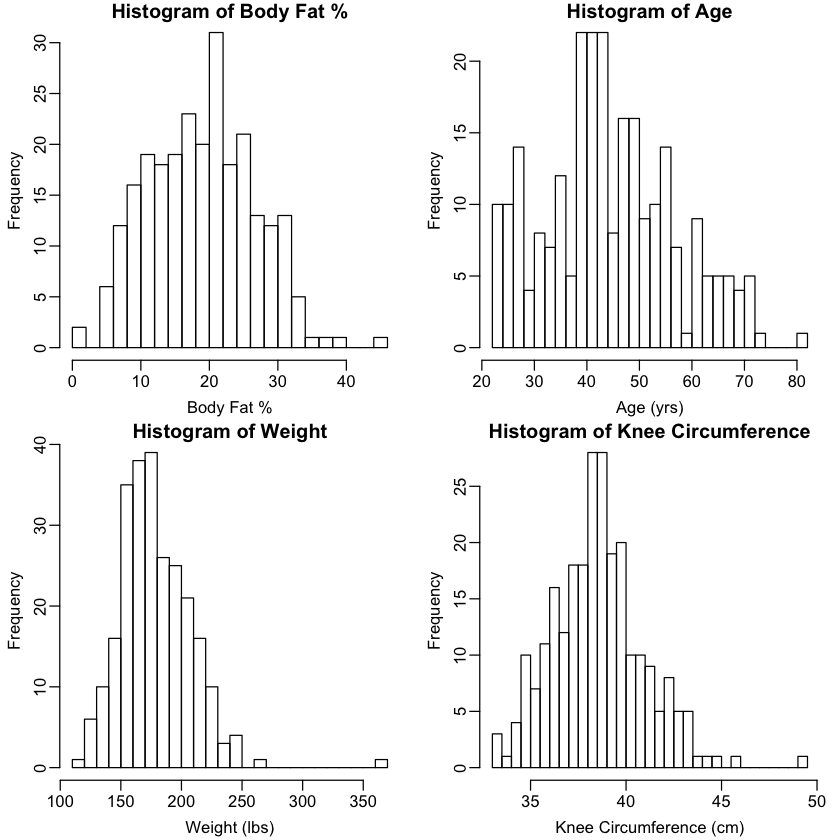

In [3]:
# You can also create multiple plots in the same window using the mfrow option inside the par() function
par(mfrow=c(2,2)) #Makes a two-by-two, i.e. (2,2), plotting window
par(mgp=c(1.8,.5,0), mar=c(3,3,1,1)) #"Beautifies" plots when creating multiple figures. Google this for more info.

hist(BODYFAT,breaks=30,
     main="Histogram of Body Fat %",xlab="Body Fat %")
hist(AGE,breaks=30,
     main="Histogram of Age",xlab="Age (yrs)")
hist(WEIGHT,breaks=30,
     main="Histogram of Weight",xlab="Weight (lbs)")
hist(KNEE,breaks=30,
     main="Histogram of Knee Circumference",xlab="Knee Circumference (cm)")

It seems like majority of individuals weight around 175 lbs 

Based on the histograms, I sometimes look at subsets of the data.

These help me detect outliers or notice general patterns about the measurements.

*Tangent (for your data science career)*: Many companies typically use `SQL` (database language), `Python` (general-purpose language), and `R` (scientific language). Also, when using `R`, industry typically uses the packages `dplyr` or `data.table` for data manipulation (i.e. merge,subset, summary statistics, etc.). Your TA has experience with `dplyr` while I have limited experience with `data.table`.

In [52]:
#Subset of the data whose weight is greater than 350 pounds
BodyFat[WEIGHT > 350,] 

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


In [78]:
# Subset of the data whose weight is less than 150 AND taller than 6ft (72 inches) (i.e. skinny, tall people)
# The & operator inside the expression acts as the AND command
BodyFat[WEIGHT < 150 & HEIGHT >= 72,]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
149,149,6.1,1.0873,25,143.75,72.50,19.3,35.2,92.3,76.5,92.1,51.9,35.7,22.0,25.8,25.2,16.9
153,153,10.6,1.0758,27,146.00,72.25,19.7,34.1,88.5,72.8,91.1,53.6,36.8,23.8,27.8,26.3,17.4


In [82]:
# Subset of the data whose weight is greater than 225 pounds taller OR is younger than 25.
# The | operator inside the expression acts as the OR command
BodyFat[WEIGHT > 250 | AGE < 25,]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
5,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
10,10,12.0,1.0722,23,198.25,73.50,25.8,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,41,33.1,1.0217,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
144,144,9.9,1.0775,23,159.75,72.25,21.6,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2
145,145,10.8,1.0754,23,188.15,77.50,22.1,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3


There are lots of things you can do with plotting and subsetting. 

In my opinion, the first two steps help me get a better picture of the data, specifically
  1. How to clean up data (i.e. are some measurements incorrect? )
  2. How measurements are taken (e.g. units, precision, etc.)
  3. Any odd individuals in the data?
  4. General demographic information (e.g. age group, height range, etc.) 

*Tangent (for your data science career)*: In real life, you'll spend A LOT of time doing these two steps. Personally, I spend about 70% of my time doing this. If you have a better idea of your data and can clean it at this stage of your data analysis (leaving proper documentation on how you cleaned it), subsequent statistical analysis becomes much easier.

## Step 3: Statistical Modeling and Analysis

After the first two steps, I try to decide on what type of statistical analysis I want to use.

For this lecture only (and to serve as a review for SLR), we'll look at the relationship between body fat % and age.

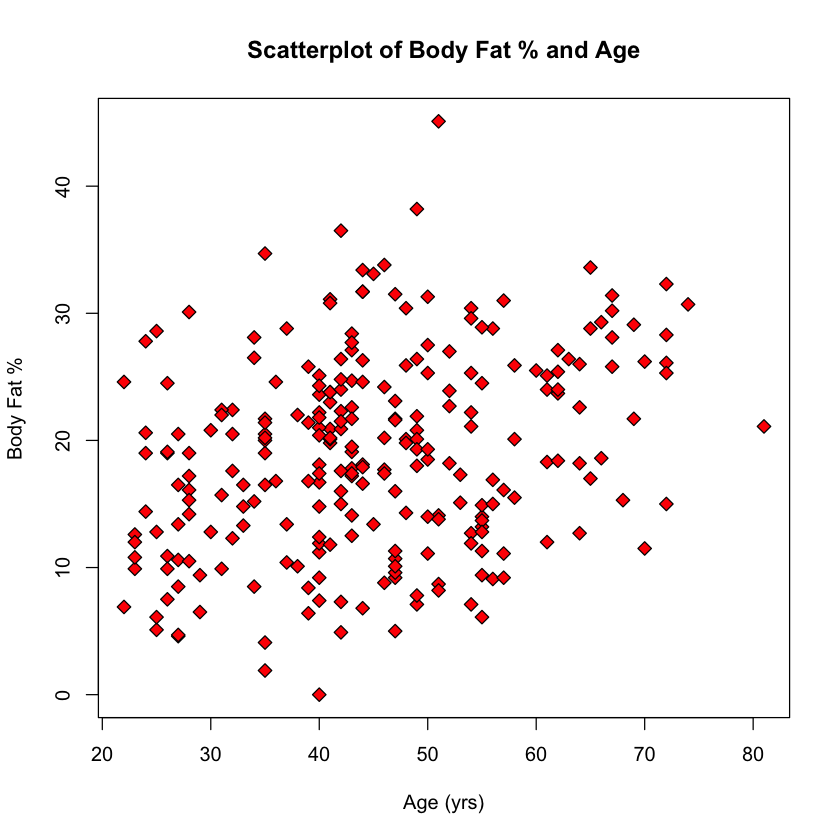

In [112]:
plot(AGE,BODYFAT,pch=23,bg="red",cex=1.2,
     xlab="Age (yrs)",ylab="Body Fat %",main="Scatterplot of Body Fat % and Age")

What do you see?

Visual questions:
  1. Ordering of the x and y axes?
  2. Units and scaling on y and x axes?
  3. Jittering? Any others?
  
Statistical questions:
  1. Any dependencies between the two variables, $Y$ and $X$?
  2. Elliptical pattern like the mother-daughter data?
  3. ``Extreme'' points?

Let's fit an SLR model:

$$ \text{(Body Fat %)}_i = \beta_0 + \beta_1 \cdot \text{Age}_{i} + \epsilon_i, \quad{} \epsilon_i \sim N(0,\sigma^2) $$

What are the units of the slope and the intercept?

Is the SLR model appropriate for this data?
  * It is a **linear** model (i.e. $Y$ is a linear function of the predictors $X$).
  * It is **additive** in the Xs and error terms, not *multiplicative*
  * The unknown parameters $\beta_0$ and $\beta_1$ are **constant** (i.e. do not change with $X$).
  * The predictors X are assumed to be **fixed**.
  * The error term $\epsilon_i$ is distributed as **Normally distributed**.
  * The variance on the error terms is assumed to be constant (i.e. **homoskedastic**).



Call:
lm(formula = BODYFAT ~ AGE)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0697  -5.7025   0.2846   4.8301  25.0739 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.95546    1.73576   6.312 1.25e-09 ***
AGE          0.17786    0.03724   4.776 3.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.435 on 250 degrees of freedom
Multiple R-squared:  0.08362,	Adjusted R-squared:  0.07996 
F-statistic: 22.81 on 1 and 250 DF,  p-value: 3.045e-06


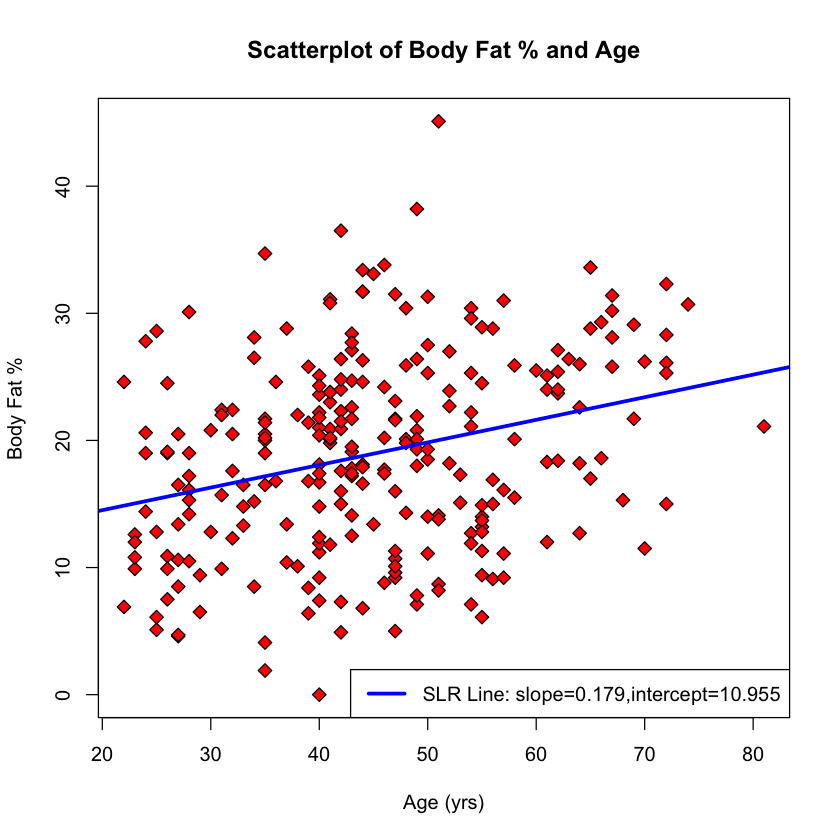

In [108]:
plot(AGE,BODYFAT,pch=23,bg="red",cex=1.2,
     xlab="Age (yrs)",ylab="Body Fat %",main="Scatterplot of Body Fat % and Age")
lmmodel = lm(BODYFAT ~ AGE)
abline(lmmodel,col="blue",lwd=3)
legend("bottomright",c("SLR Line: slope=0.179,intercept=10.955"),col="blue",lwd=3,lty=c(1))
summary(lmmodel)

According to our SLR model, if we want to use age to predict body fat %, we can use the equation 
    
$$ \text{(Body Fat %)} = 10.955 + 0.179 \text{Age} $$

For example, for a recent male college graduate (e.g. age 22), his predicted body fat % percentage would be around 14.87%. There is a 95% probability that his body fat is between 0.10% and 29.64%.

**Observation 1**: Age explains about 8.4% of the variation in body fat % (based on $R^2$)

**Observation 2**: Every year, men gain, on average, 0.179% of body fat %. Every decade, men gain, on average, 1.79% of body fat %.

In [110]:
predict(lmmodel,newdata=data.frame(AGE=22),interval="predict")

,fit,lwr,upr
1,14.86828,0.1012624,29.6353


$$ \text{(Body Fat %)} = 10.955 + 0.179 \text{Age} $$

Suppose the null hypothesis is that age is (linearly) unrelated to body fat %, i.e. $H_0: \beta_1 = 0$, and the alternative is that it isn't, i.e. $H_1: \beta_1 \neq 0$. The associated p-value is 3.04 * 10^-6. 

We can declare that there is a linear relationship between age and body fat %. However, our conclusion carries a 5% error rate where we may have falsely declared that there is a relationship even though there truly isn't a relationship.

Correspondingly, the 95% confidence interval for the slope is $(0.10, 0.25)$ and the intercept is $(7.54, 14.37)$. In other words, we are 95% confident that the interval $(0.10, 0.25)$ contains the true slope value $\beta_1$.

In [149]:
confint(lmmodel)

,2.5 %,97.5 %
(Intercept),7.536883,14.374040
AGE,0.104517,0.251194


## Step 4: Diagnostics

After model fitting, I typically diagnose the SLR assumptions with a residual plot and a QQ plot.

1. Residual plot: good for diagnosing (i) linearity vioations, (ii) homoskedasticity violations, and (iii) detecting outliers

2. QQ plot: good for diagnosing violations to Normality

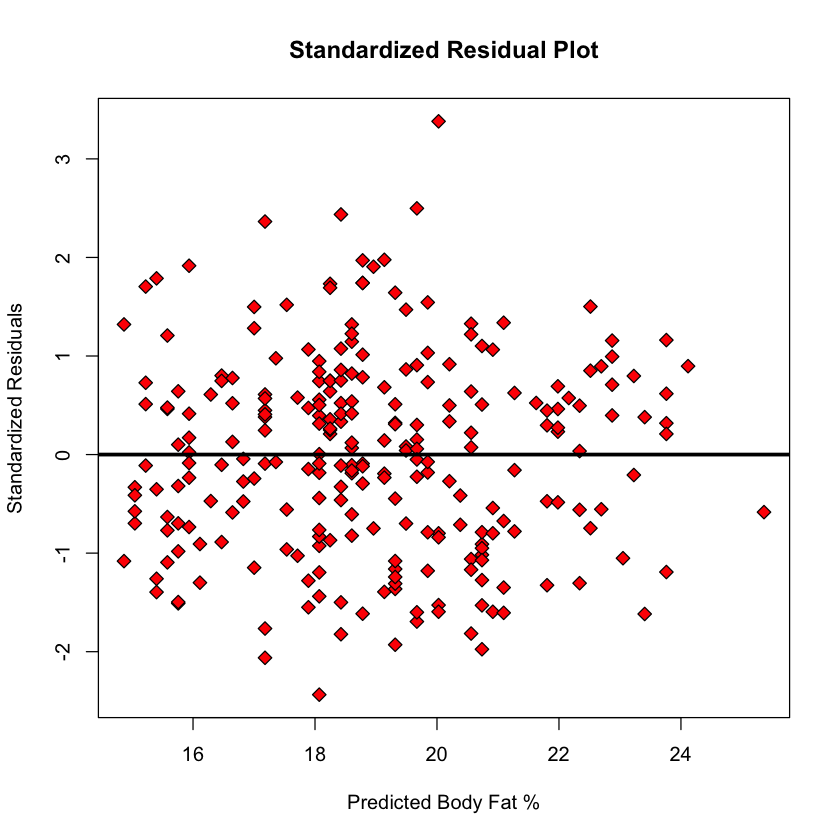

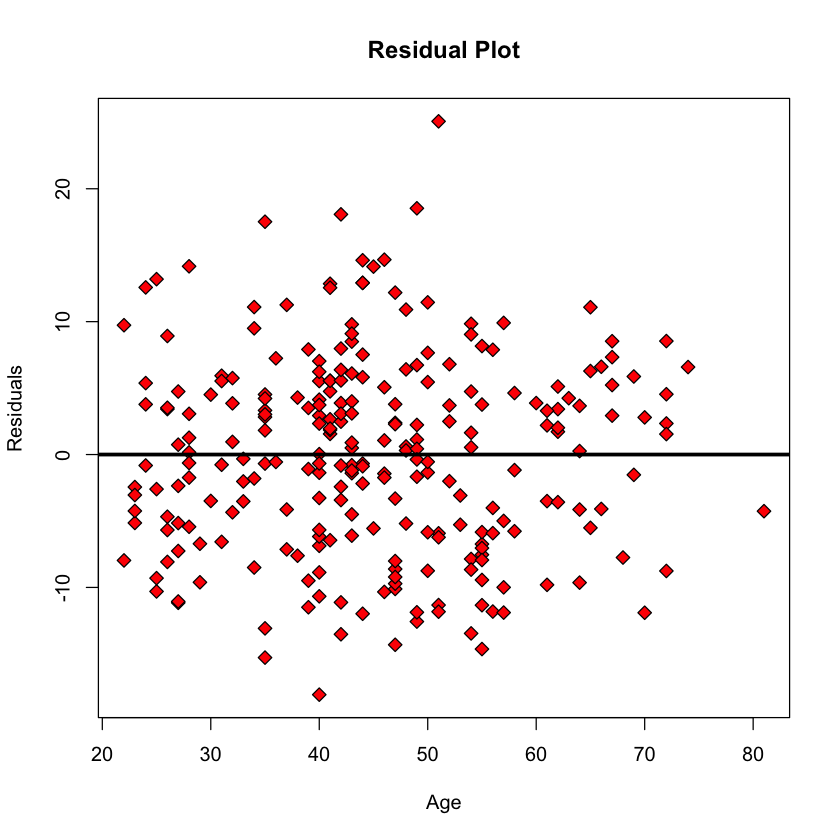

In [148]:
par(mfrow = c(1,1))
plot(predict(lmmodel),rstandard(lmmodel),pch=23,bg="red",cex=1.2,
    xlab="Predicted Body Fat %", ylab="Standardized Residuals",main="Standardized Residual Plot")
abline(a=0,b=0,col="black",lwd=3)

plot(AGE,resid(lmmodel),pch=23,bg="red",cex=1.2,
    xlab="Age", ylab="Residuals",main="Residual Plot")
abline(a=0,b=0,col="black",lwd=3)

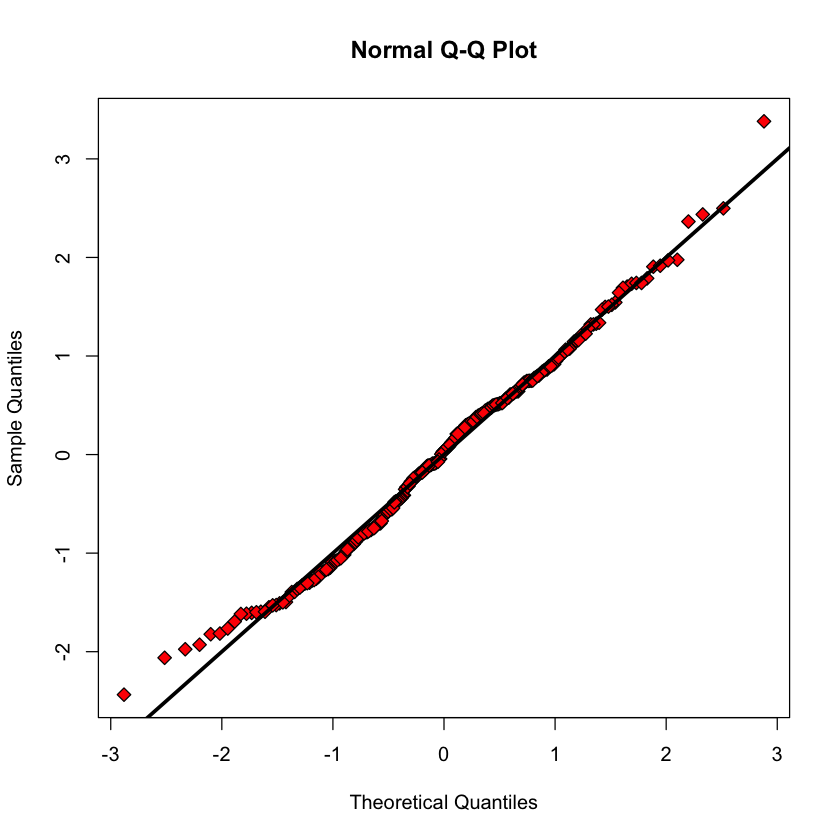

In [132]:
qqnorm(rstandard(lmmodel),pch=23,bg="red",cex=1.2)
abline(a=0,b=1,col="black",lwd=3)

We should also check for influential points and outliers.

For influential points, we will use both the Cook's distance and the $p_{ii}$ measures.

For outliers, we can go back to the residual plot and see if there are any points that are suspiciously larger than it should be for the SLR model.

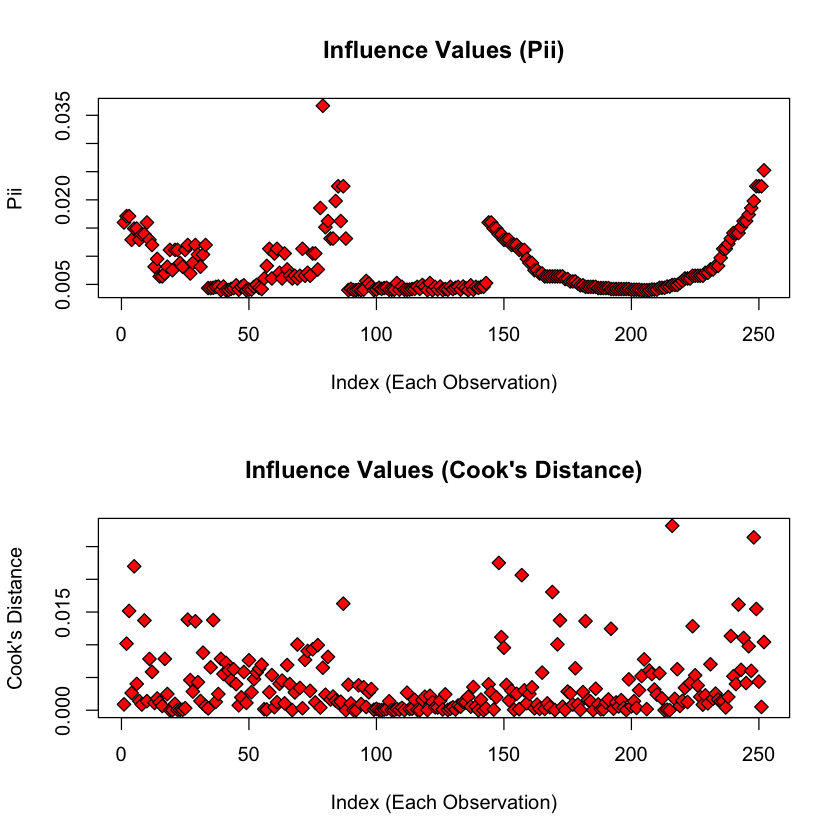

In [124]:
pii = hatvalues(lmmodel)
cooki = cooks.distance(lmmodel)

par(mfrow = c(2,1))
n = dim(BodyFat)[1]
plot(1:n,pii,type="p",pch=23,bg="red",cex=1.2,
     xlab="Index (Each Observation)",ylab="Pii",main="Influence Values (Pii)")
plot(1:n,cooki,type="p",pch=23,bg="red",cex=1.2,
     xlab="Index (Each Observation)",ylab="Cook's Distance",main="Influence Values (Cook's Distance)")

Our Proposed SLR Model if we want to use age to predict body fat %:
    
$$ \text{(Body Fat %)} = 10.955 + 0.179 \text{Age} $$

**Possible rule of thumb**: "multiply your age by 0.2 and add 11"

This rule of thumb tends to underestimate your body fat % compared to the estimated model if you are young while it tends to overestimate your body fat % when you are old. 

*Side Note 1*: This rule of thumb is close to our estimated model by constructing 95% confidence intervals of the slope and the intercept.

**Example Usage**: for a recent college graduate (e.g. age 22), his predicted body fat % percentage would be around 14.87%. There is a 95% probability that his body fat is between 0.10% and 29.64%.

With the rule of thumb, you get about 13.2% as the predicted body fat %.

**Inference about Relationship**: There is clearly a linear relationship between age and body fat % and this relationship is significant at the $\alpha = 0.05$ level (with p-value $3.04*10^{-6}$). However, age only explains about 8.4% of all the variation in body fat %.

Also, according to this model, every year, a male is expected to gain about 0.18% in body fat %

**Strengths and Weakness of Model**: I think the SLR is a reasonable model between body fat % and age, despite some caveats.
  1. Linearity: seems reasonable (both based on diagnostic residual plot and original scatterplot)
  2. Additivity: probably not reasonable since it's difficult to believe that body fat % is additive as you get older.
  3. Constant effects: again, probably not reasonable because younger people will have different diets/lifestyle than older people.
  4. Fixed X: This seems reasonable for this data.
  5. Normally distributed errors: seems reasonable from the QQ plot diagnostic (but, possible skinny tailing or right skewing issue)?
  6. Constant variance: This also seems a bit suspect based on the diagnostic plot where old people tend to have less variation in their body fat % than young people.
  7. The precision of our body fat % prediction is low and age only explains 8.4% of the variation in body fat % among men.
  
Overall, our model provides a very simple way of guess-timating the body fat % purely based on age. However, because of its simplicity, our predictions aren't very precise. In addition, when interpreting the SLR model, we note that some of the assumptions, especially aditivity, constant effects, and homoskedasticity, may be violated.